In [21]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [22]:
class quadState(TypedDict):
    a: int
    b: int
    c: int
    
    equation: str
    disc: float
    result: str


In [23]:
def Show_Equation(state: quadState) -> quadState:

    equation = f"The quadratic equation is: {state['a']}x² + {state['b']}x + {state['c']} = 0"

    return {"equation": equation}

In [24]:
def Calculate_Discriminant(state: quadState) -> quadState:
    
    disc = state['b']**2 - 4*state['a']*state['c']
    
    return {"disc": disc}

In [41]:
def real_Roots(state: quadState) -> quadState:
    
    root1 = (-state['b'] + state['disc']**0.5) / (2*state['a'])
    root2 = (-state['b'] - state['disc']**0.5) / (2*state['a'])

    result = f"The equation has two real roots: {root1} and {root2}"

    return {"result": result}

def complex_Roots(state: quadState) -> quadState:
    
    real_part = -state['b'] / (2*state['a'])
    imag_part = (-state['disc']**0.5) / (2*state['a'])

    result = f"The equation has two complex roots: {real_part} + {imag_part}i and {real_part} - {imag_part}i"

    return {"result": result}

def repeated_Root(state: quadState) -> quadState:
    
    root = -state['b'] / (2*state['a'])

    result = f"The equation has one repeated real root: {root}"

    return {"result": result}

def check_Discriminant(state: quadState) -> Literal['real_Roots', 'complex_Roots', 'repeated_Root']:
    
    if state['disc'] > 0:
        return 'real_Roots'
    elif state['disc'] < 0:
        return 'complex_Roots'
    else:
        return 'repeated_Root'

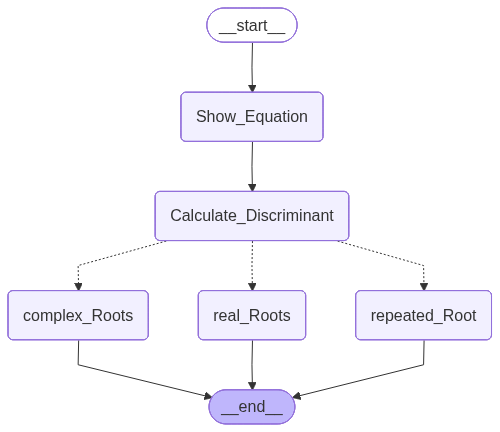

In [42]:
graph = StateGraph(quadState)

graph.add_node("Show_Equation", Show_Equation)
graph.add_node("Calculate_Discriminant", Calculate_Discriminant)

graph.add_node("real_Roots", real_Roots)
graph.add_node("complex_Roots", complex_Roots)
graph.add_node("repeated_Root", repeated_Root)

graph.add_edge(START, "Show_Equation")
graph.add_edge("Show_Equation", "Calculate_Discriminant")

graph.add_conditional_edges("Calculate_Discriminant", check_Discriminant)
graph.add_edge("real_Roots", END)
graph.add_edge("complex_Roots", END)
graph.add_edge("repeated_Root", END) 

workflow = graph.compile()
workflow

In [43]:
initial_state = {
    "a": 1,
    "b": -3,
    "c": 2
}

workflow.invoke(initial_state)

{'a': 1,
 'b': -3,
 'c': 2,
 'equation': 'The quadratic equation is: 1x² + -3x + 2 = 0',
 'disc': 1,
 'result': 'The equation has two real roots: 2.0 and 1.0'}